In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/boston.csv')

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df[df.duplicated()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


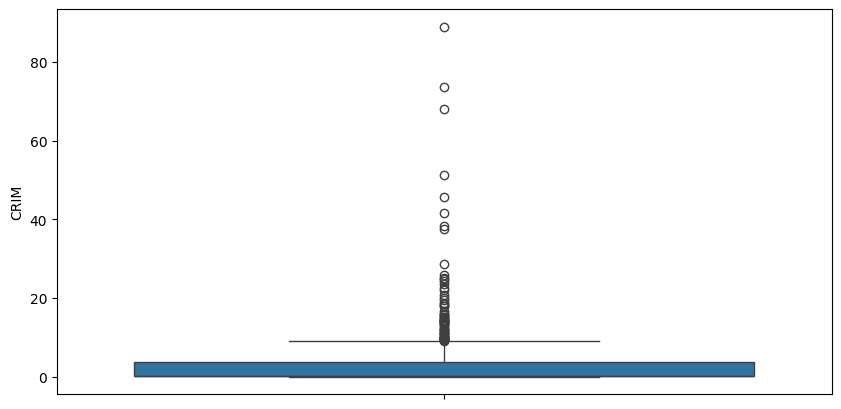

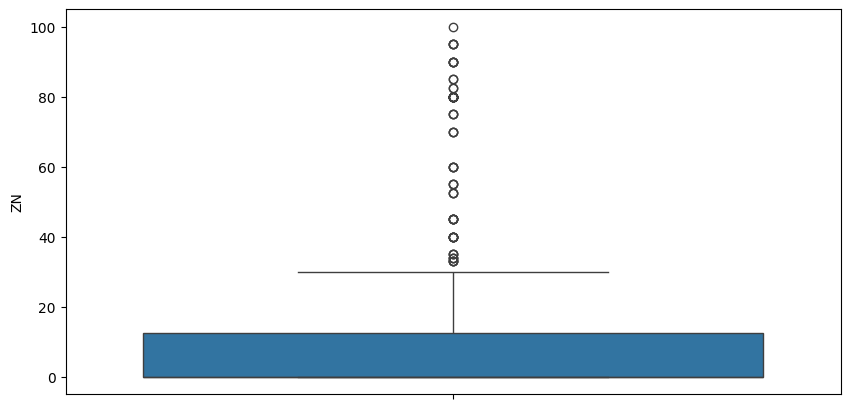

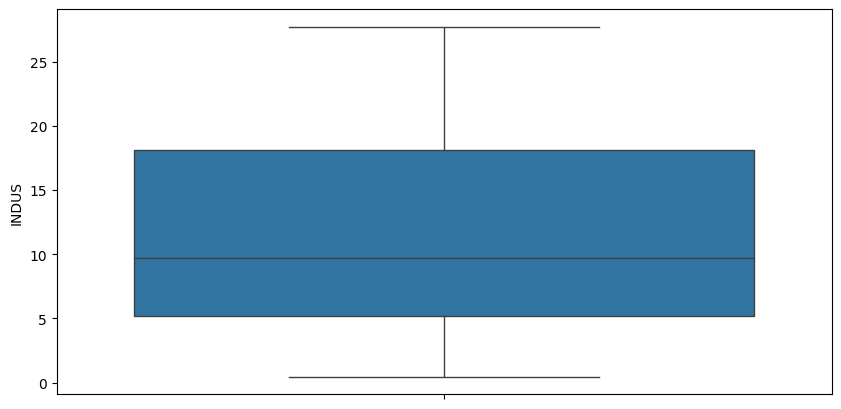

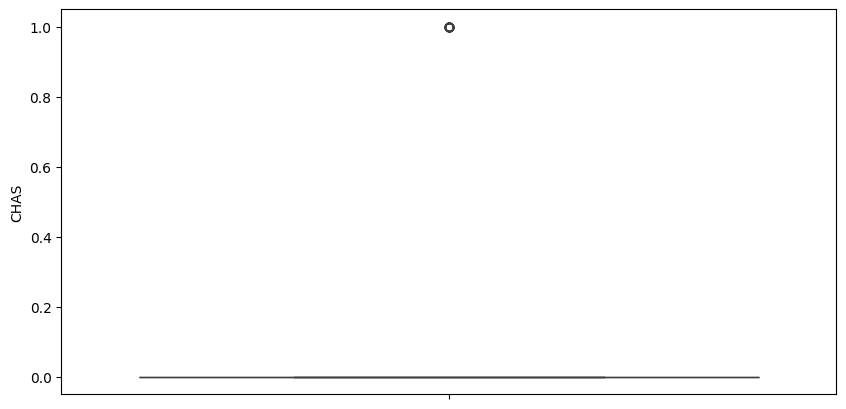

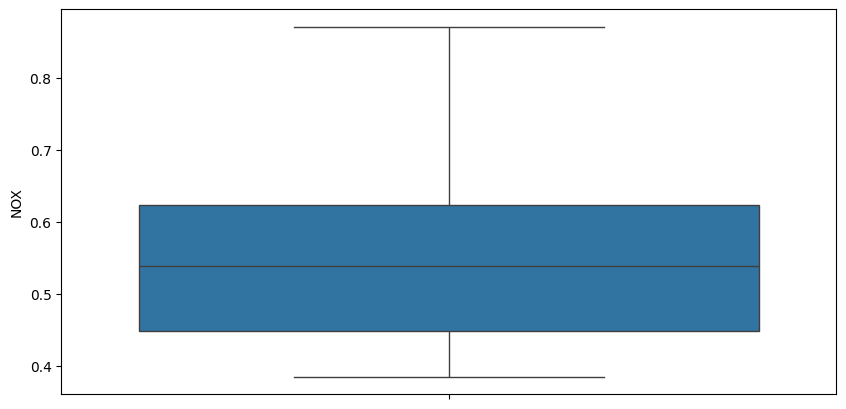

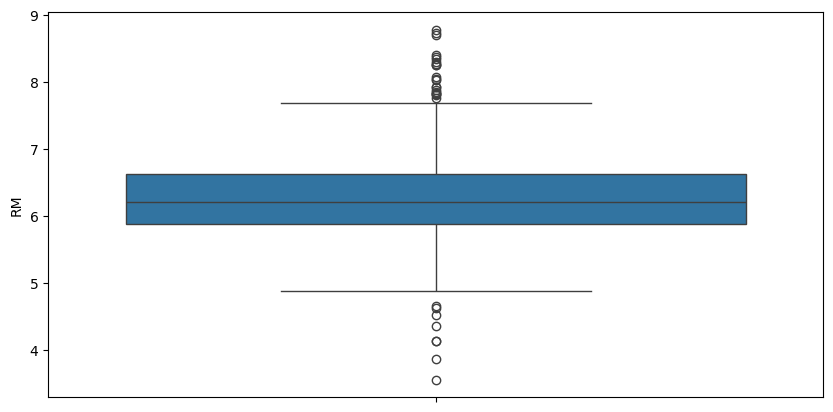

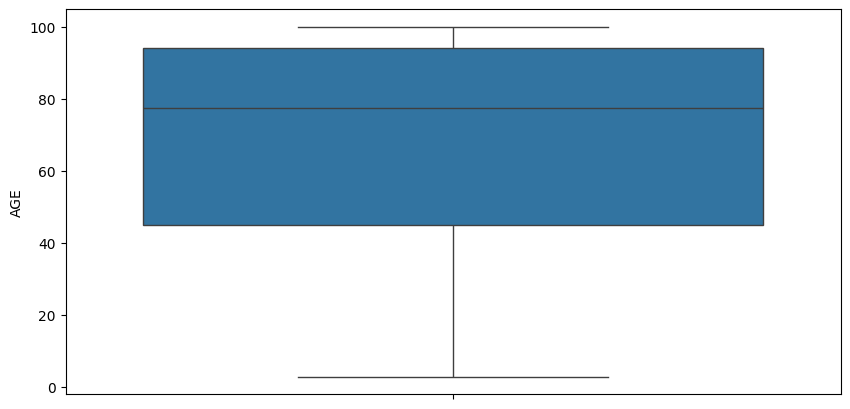

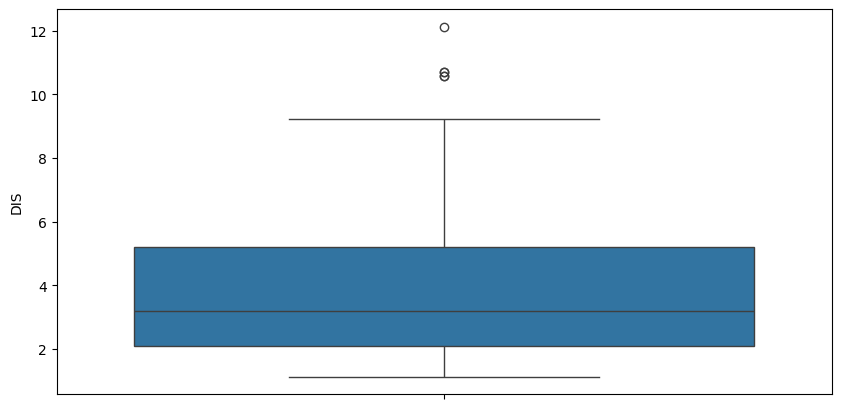

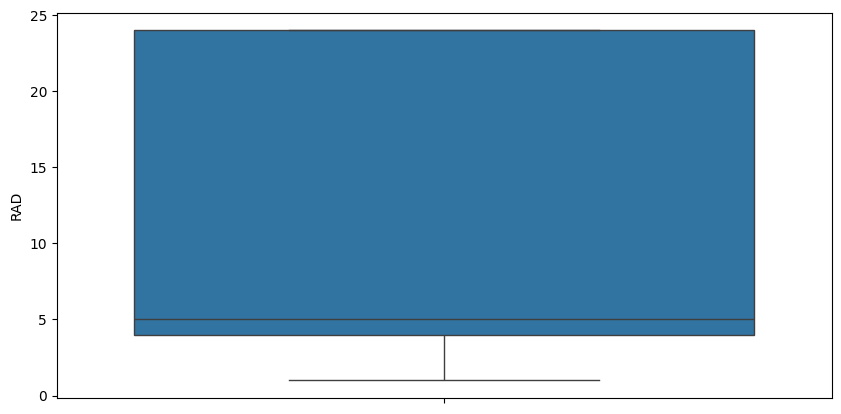

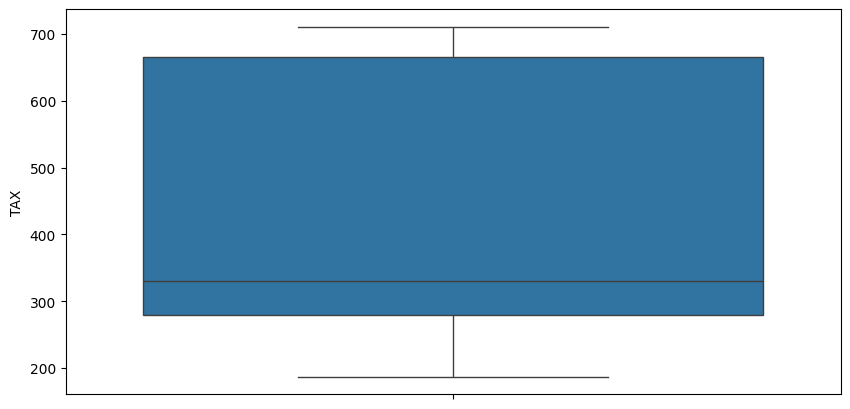

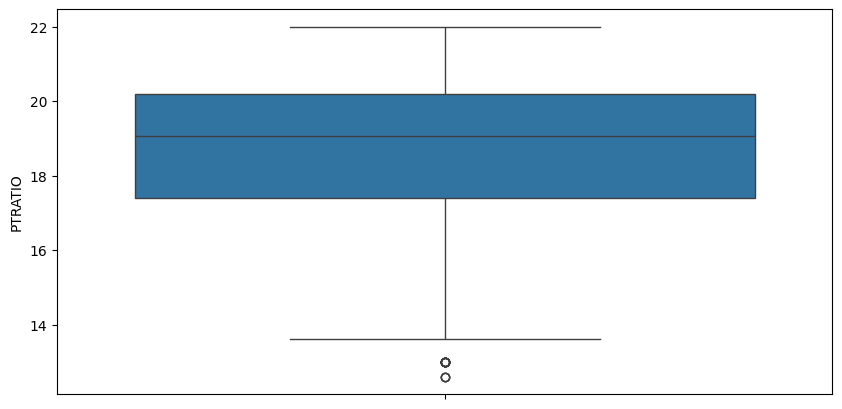

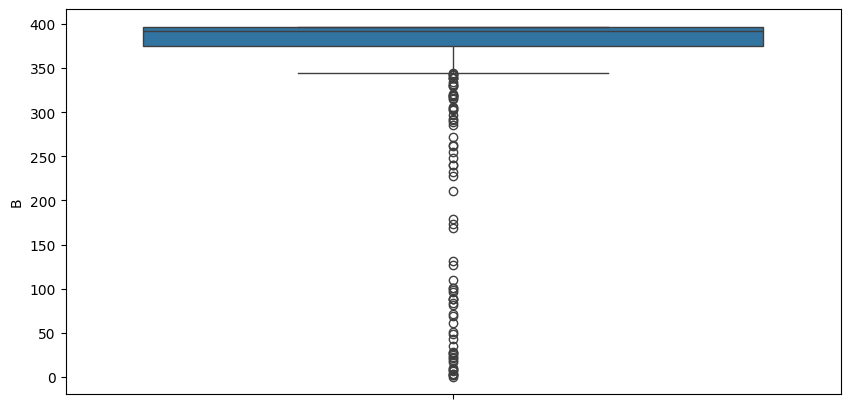

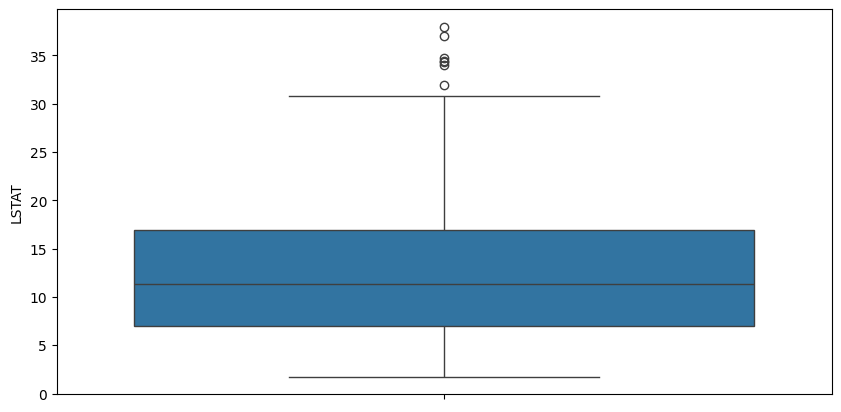

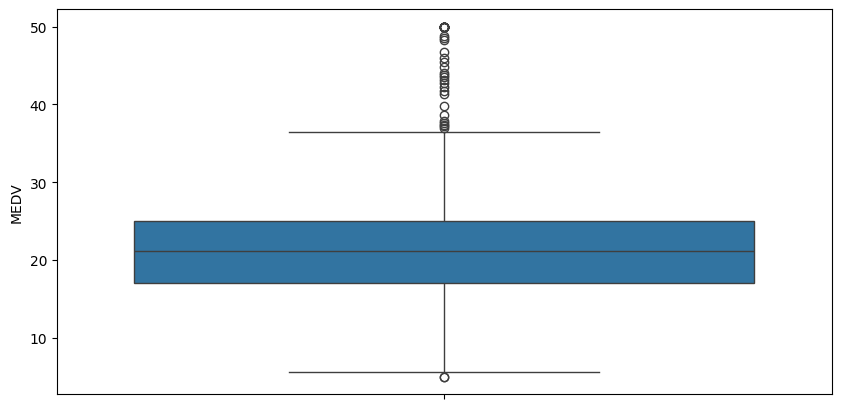

In [ ]:
for b in df.columns:
  plt.figure(figsize=(10,5))
  sns.boxplot(df[b])

/tmp/ipython-input-63-177528070.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/tmp/ipython-input-63-177528070.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/tmp/ipython-input-63-177528070.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in se

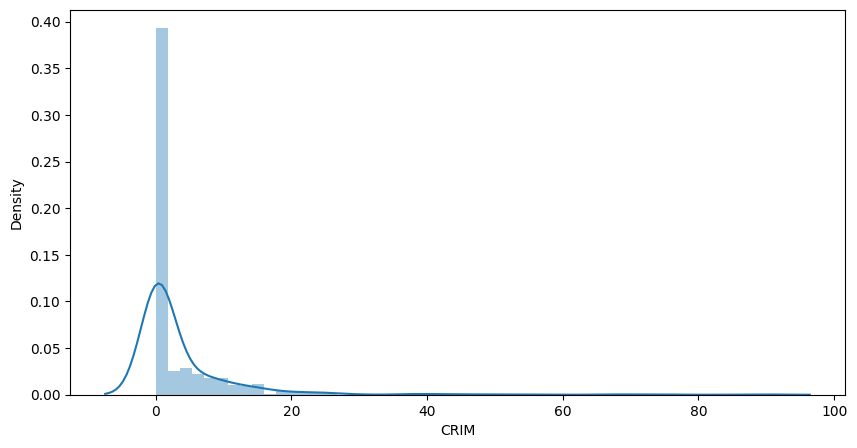

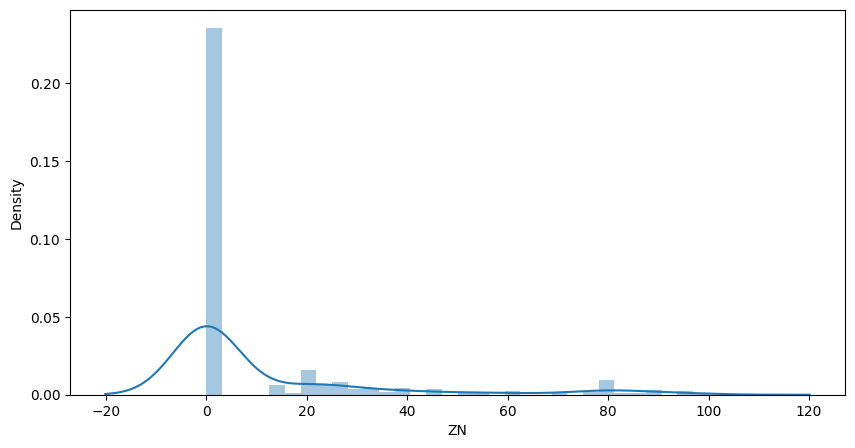

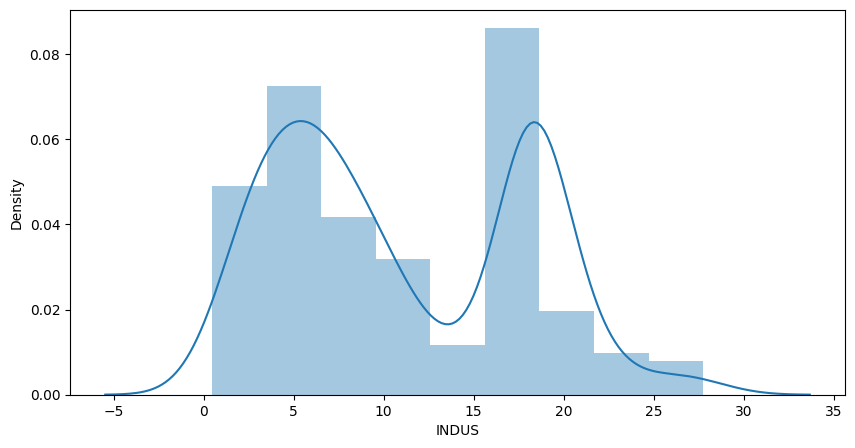

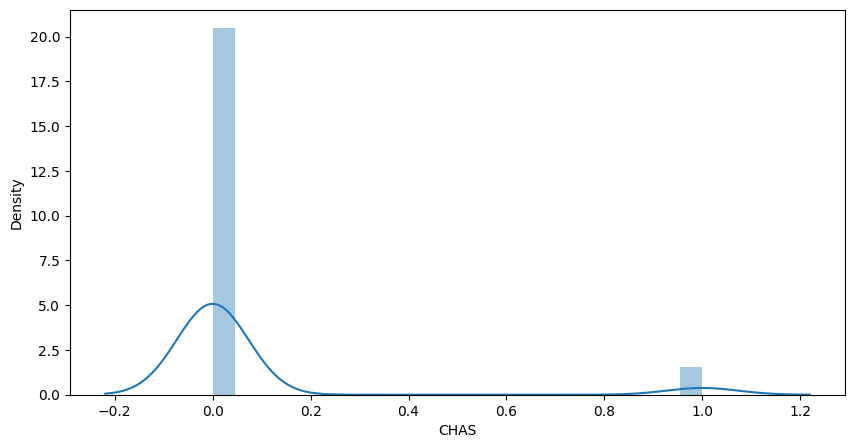

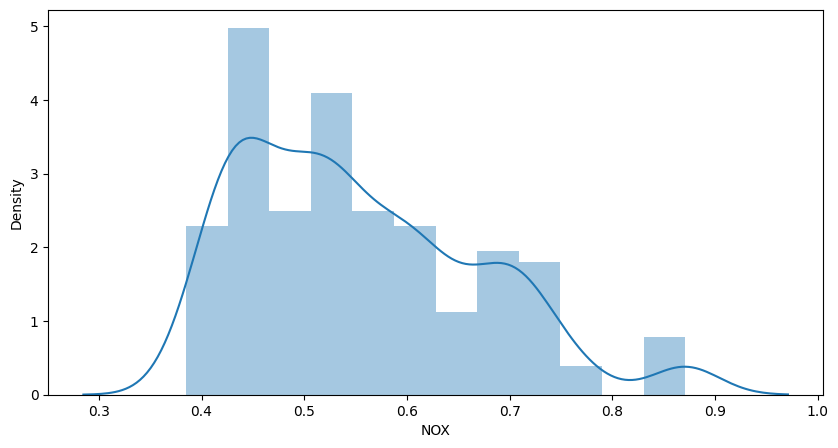

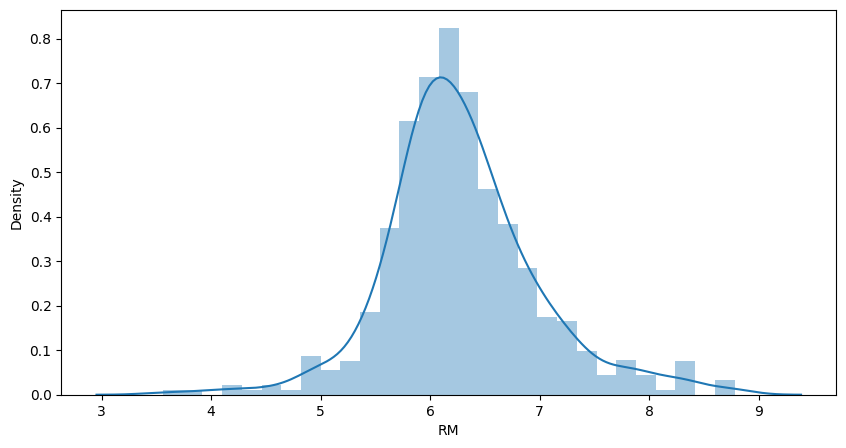

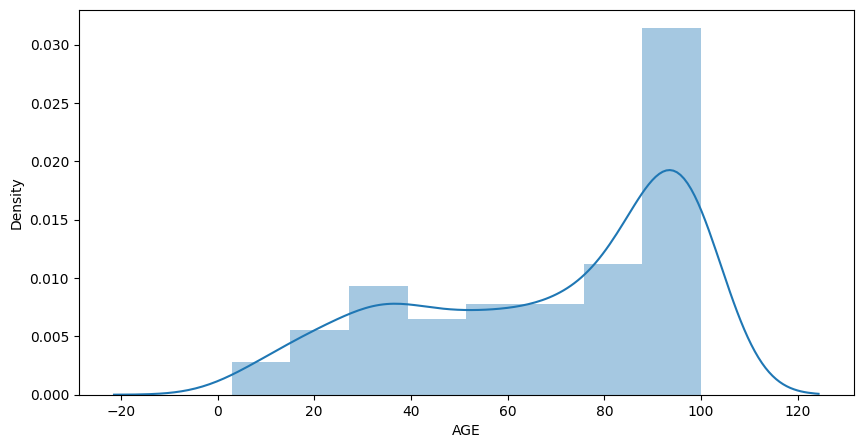

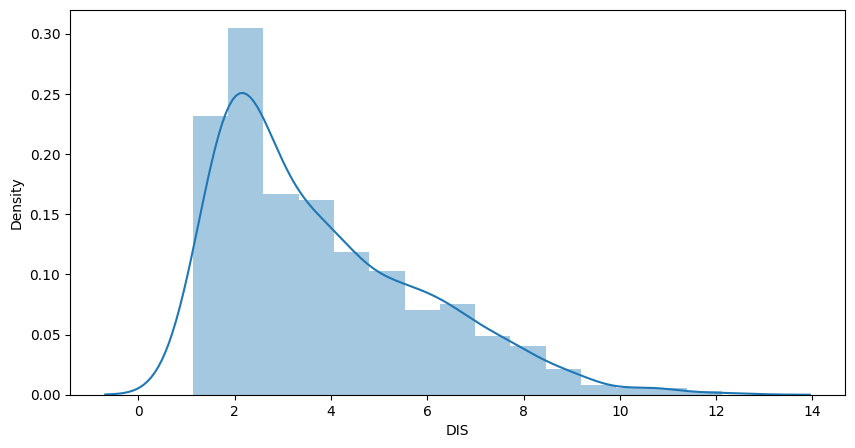

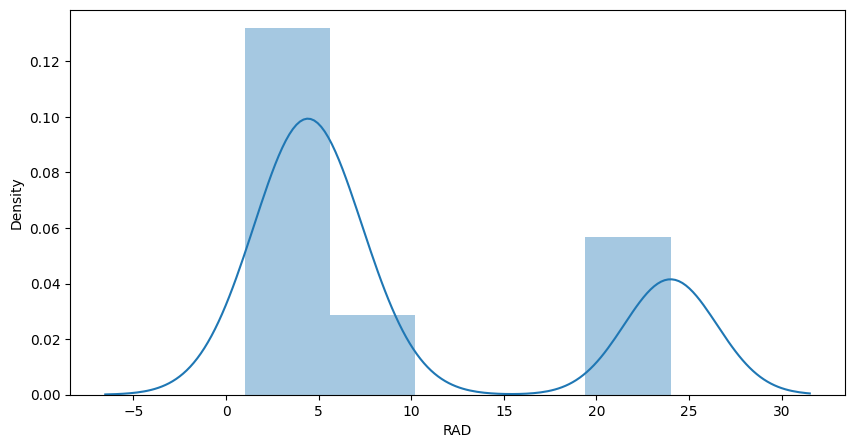

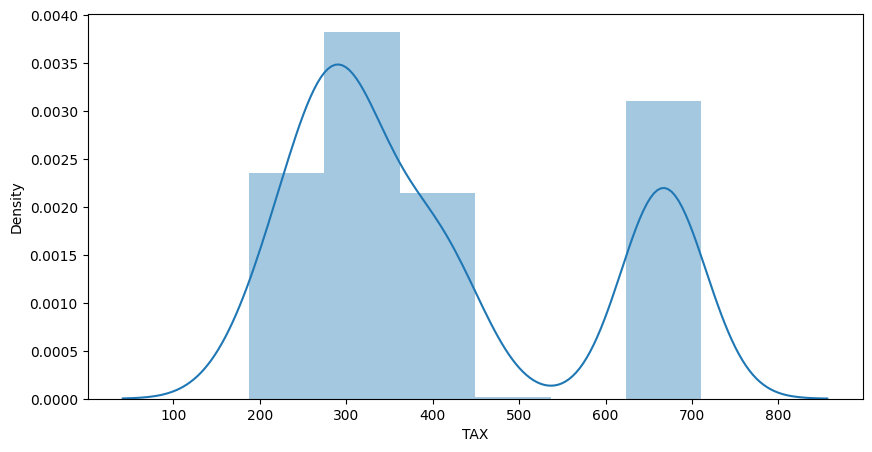

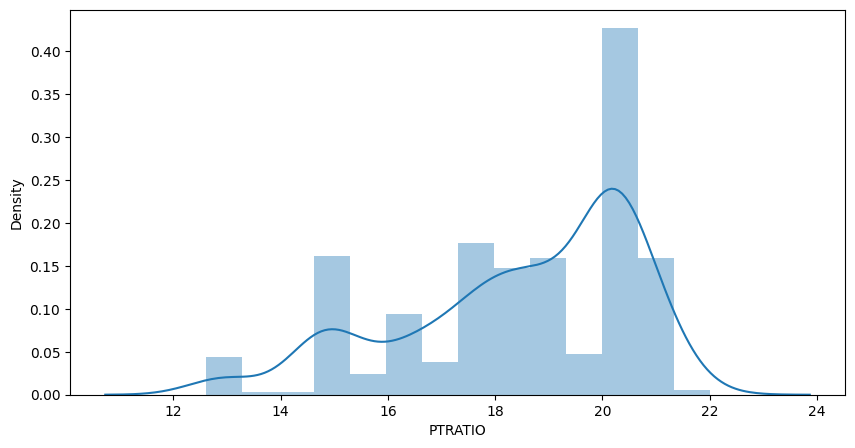

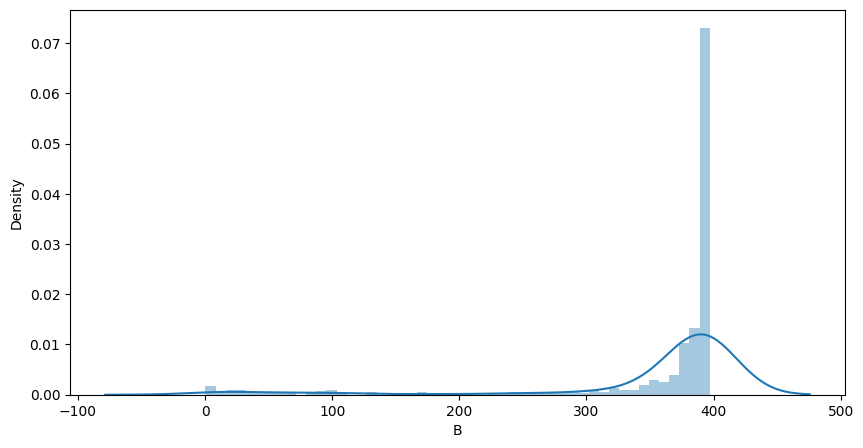

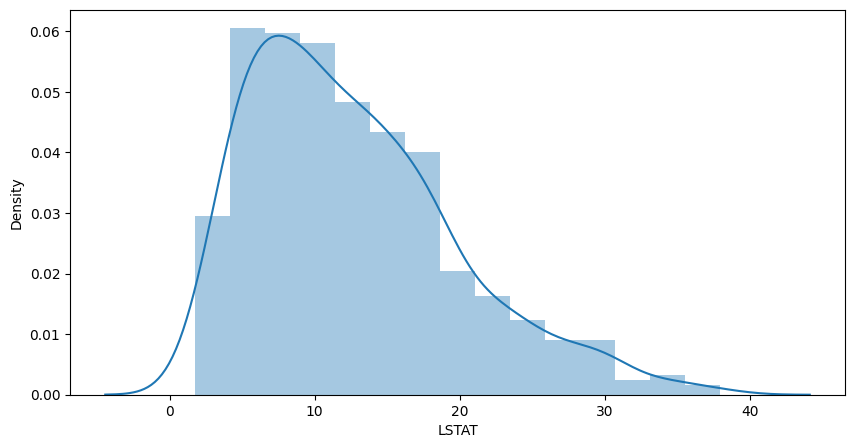

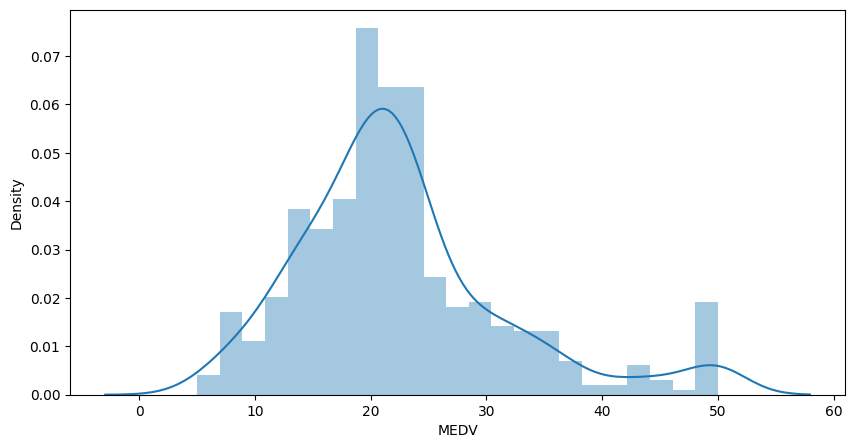

In [ ]:
for i in df.columns:
  plt.figure(figsize=(10,5))
  sns.distplot(df[i])

In [ ]:
from scipy.stats.mstats import winsorize

def detect_outliers_iqr(series):
  Q1 = series.quantile(0.25)
  Q3 = series.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return((series < lower_bound) | (series > upper_bound)).any()

# numeric_cols = df.select_dtypes(include=[np.number]).columns

outlier_columns = [col for col in df if detect_outliers_iqr(df[col])]

df_processed = df.copy()
for col in outlier_columns:
  df_processed[col] = winsorize(df[col], limits=[0.15, 0.15])

print(f"Original shape: {df.shape}")
print(f"Columns with outliers: {len(outlier_columns)}")
print(f"Outlier columns: {outlier_columns}")

Original shape: (506, 14)
Columns with outliers: 9
Outlier columns: ['CRIM', 'ZN', 'CHAS', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


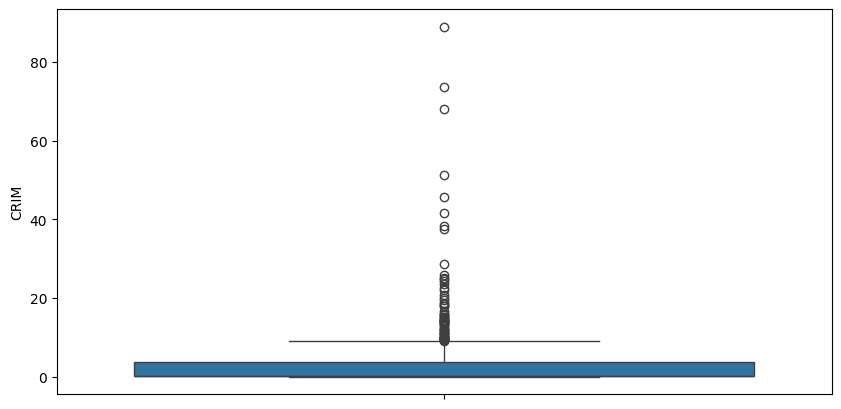

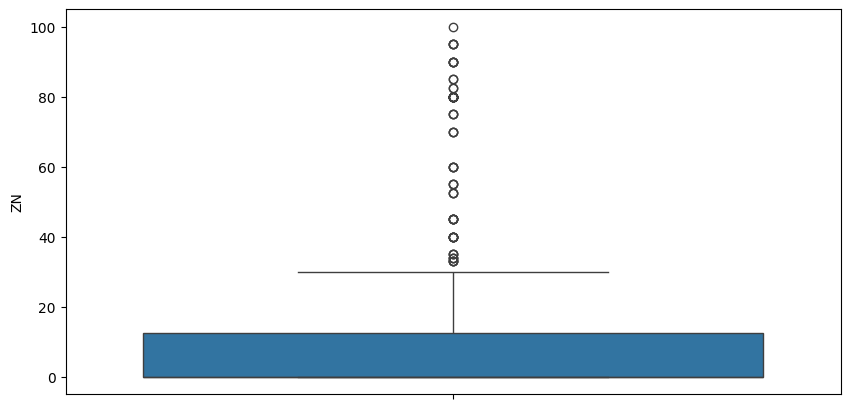

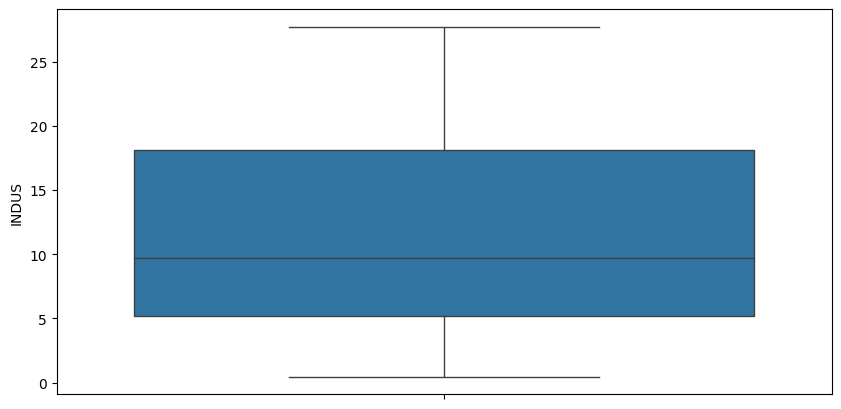

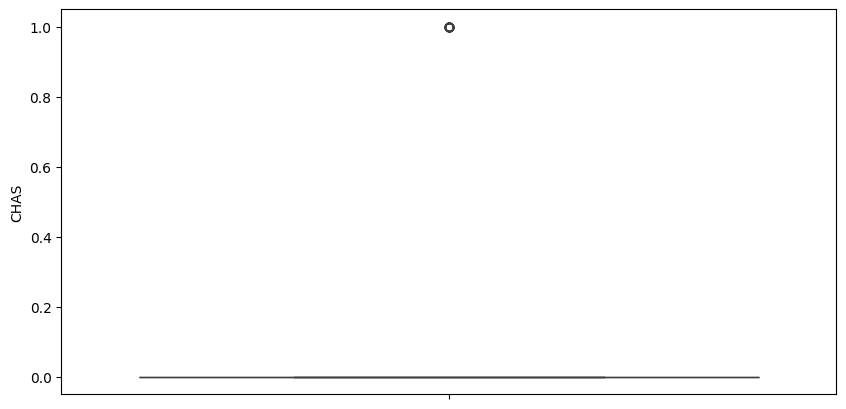

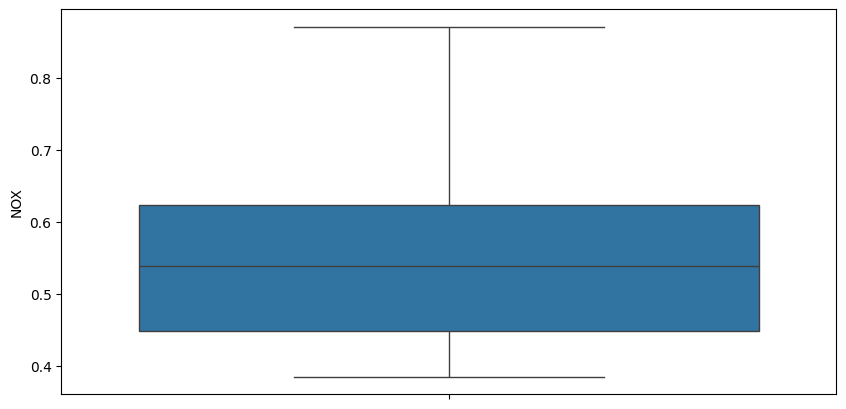

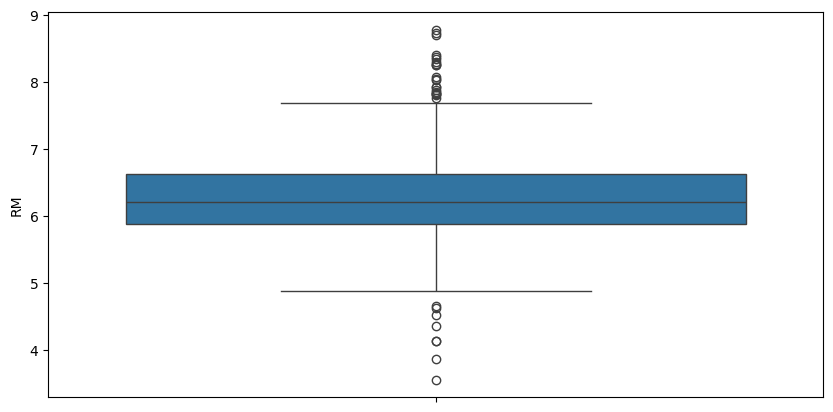

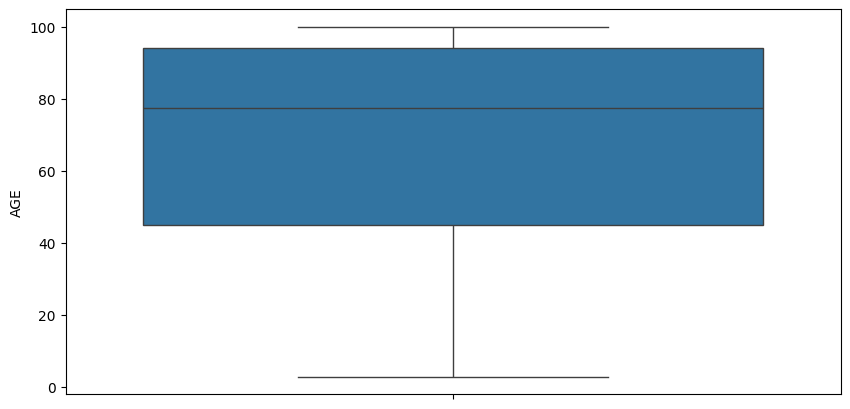

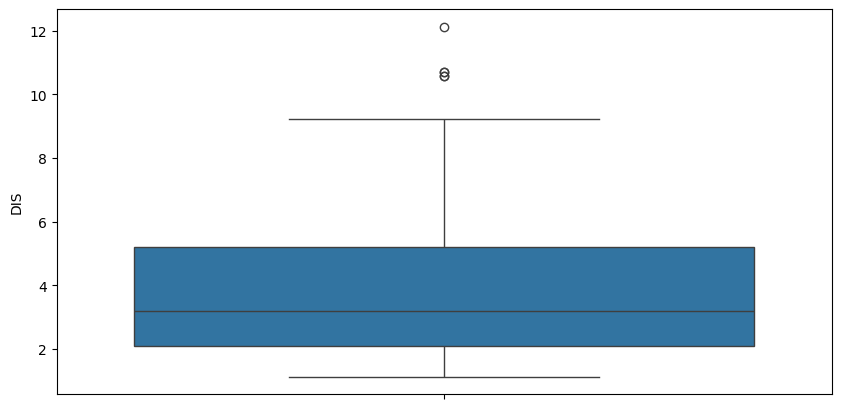

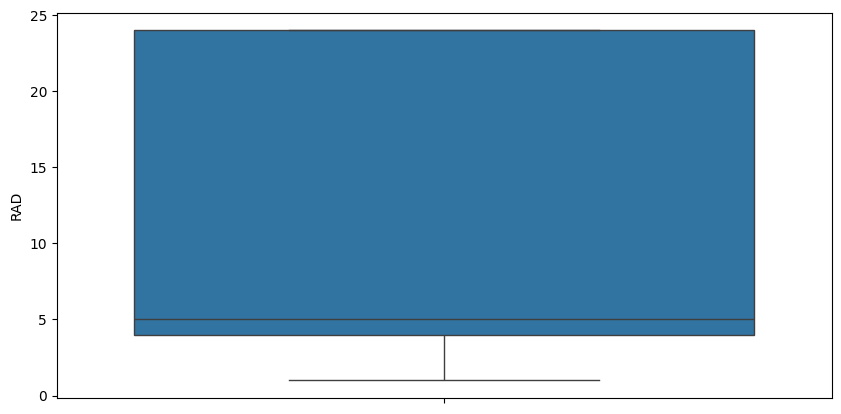

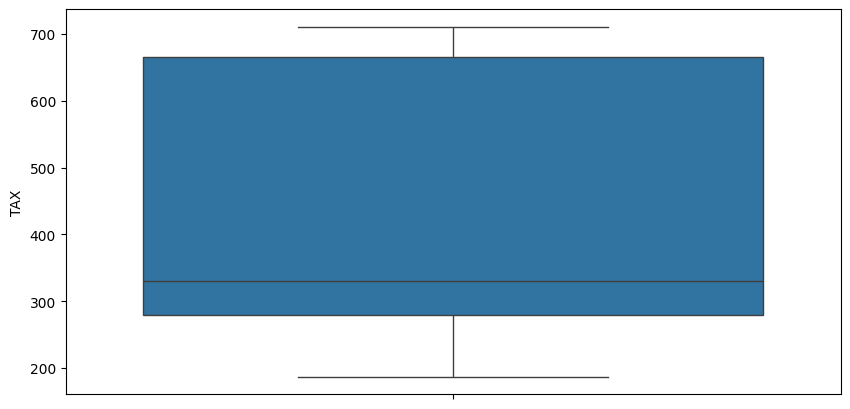

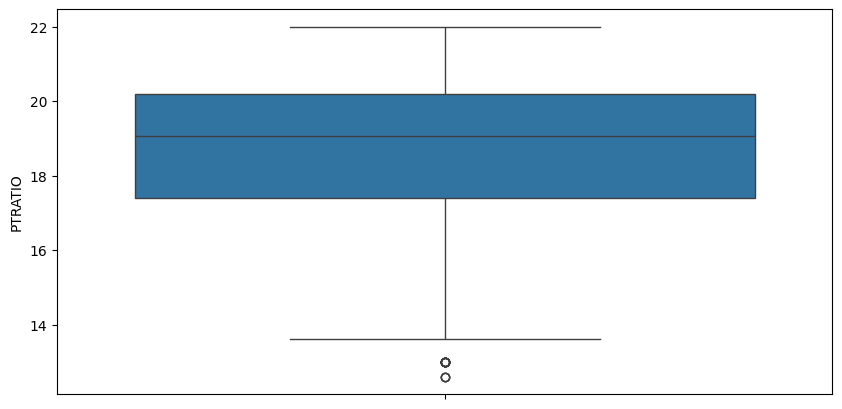

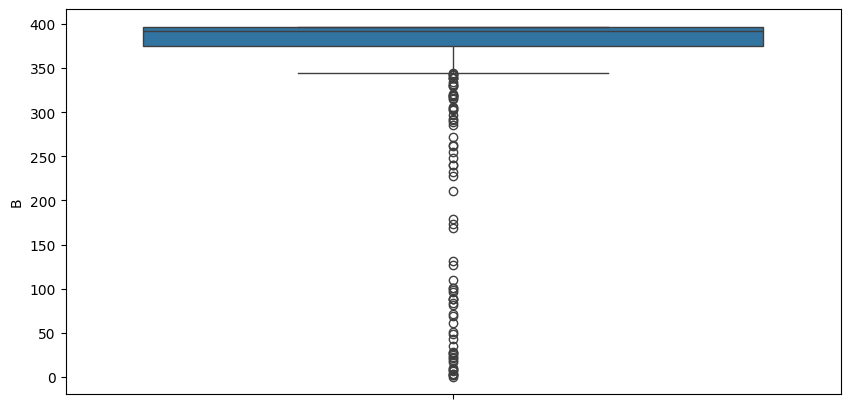

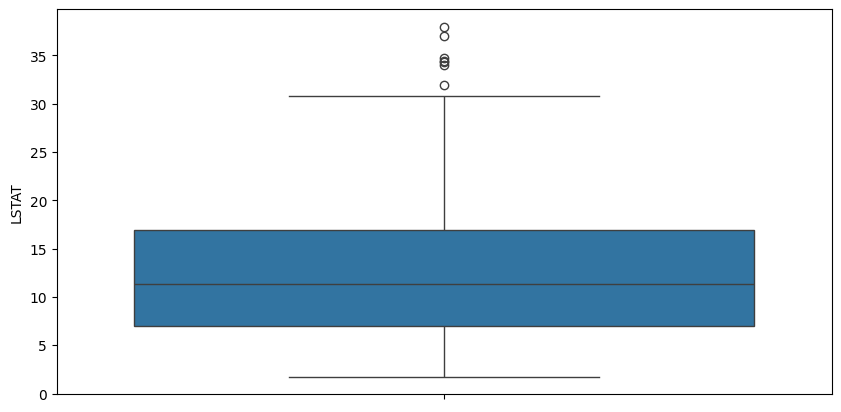

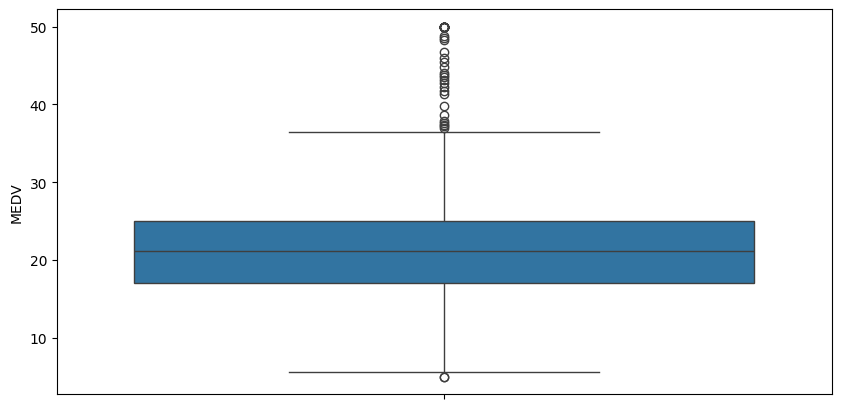

In [ ]:
for n in df_processed.columns:
  plt.figure(figsize=(10,5))
  sns.boxplot(df[n])

<Axes: >

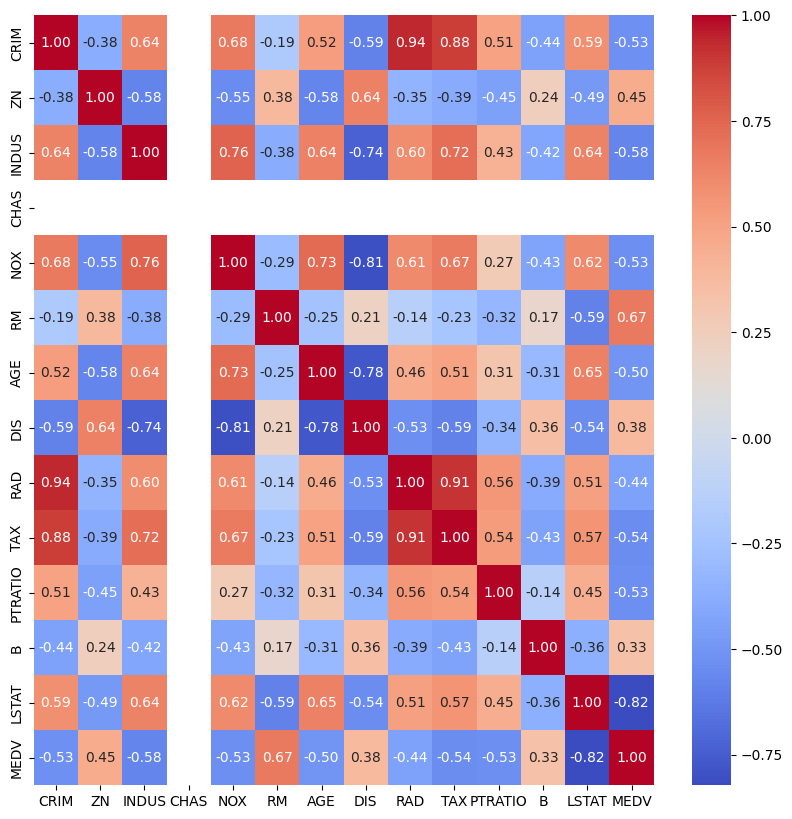

In [ ]:
correlation = df_processed.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, fmt = '.2f',cmap='coolwarm')

In [ ]:
df_processed.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.05059,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.5,396.90,5.39,24.0
1,0.05059,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.05059,0.0,7.07,0,0.469,6.943,61.1,4.9671,2,242.0,17.8,392.83,5.39,31.1
3,0.05059,0.0,2.18,0,0.458,6.943,45.8,6.0622,3,222.0,18.7,394.63,5.39,31.1
4,0.06905,0.0,2.18,0,0.458,6.943,54.2,6.0622,3,222.0,18.7,396.90,5.39,31.1


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
models = {'Ridge': {'model' : Ridge(), 'params' : {'alpha' : [0.1, 1.0, 10.0]}},
          'Lasso': {'model' : Lasso (), 'params' : {'alpha' : [0.01 , 0.1, 1.0, 10.0]}},
          'ElasticNet': {'model' : ElasticNet(), 'params' : {'alpha' : [0.01, 0.1, 1.0], 'l1_ratio' : [0.2, 0.5, 0.8]}}}

In [ ]:
X = df_processed.drop('MEDV', axis=1)
y = df_processed['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
for name, config in models.items():
    pipe = make_pipeline(StandardScaler(), config['model'])

    param_grid = {}
    for param_name, param_values in config['params'].items():
        param_grid[f'{name.lower()}__' + param_name] = param_values

    grid = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_train_pred = grid.predict(X_train)
    y_test_pred = grid.predict(X_test)

    r2_train = (r2_score(y_train, y_train_pred))
    mse_train = mean_squared_error(y_train, y_train_pred)

    r2_test = (r2_score(y_test, y_test_pred))
    mse_test = mean_squared_error(y_test, y_test_pred)

    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse = np.sqrt(mse_test)

    print(f'Model: {name}')
    print(f'r2 train: {r2_train:.4f}')
    print(f'Train Mean Squared Error: {mse_train:.2f}')
    print(f'r2 test: {r2_test:.4f}')
    print(f'Test Mean Squared Error: {mse_test:.2f}')
    print(f'Mean Absolute Error: {mae_test:.2f}')
    print(f'Root Mean Squared Error: {rmse:.2f}\n')

Model: Ridge
r2 train: 0.8082
Train Mean Squared Error: 6.59
r2 test: 0.8062
Test Mean Squared Error: 5.59
Mean Absolute Error: 1.72
Root Mean Squared Error: 2.36

Model: Lasso
r2 train: 0.8080
Train Mean Squared Error: 6.60
r2 test: 0.8062
Test Mean Squared Error: 5.59
Mean Absolute Error: 1.72
Root Mean Squared Error: 2.36

Model: ElasticNet
r2 train: 0.8080
Train Mean Squared Error: 6.60
r2 test: 0.8058
Test Mean Squared Error: 5.60
Mean Absolute Error: 1.72
Root Mean Squared Error: 2.37

